# Notebook d'essai sur le paradoxe de Stein

## Importation des packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Importation des données 


In [2]:
data = pd.read_excel(r'c:\Users\ACER\Documents\Projet IA\Datasets\Carbone_data.xlsx')
data.head()

,plot_id,Carbon,shdi,tree_prop,built_prop,crop_prop,NDVI,NDWI,LST,precip
0,1,1.093465e+06,0.981208,40.230665,0.000000,6.671190,0.331755,-0.347820,29.741554,1056.380493
1,2,1.079817e+06,1.006183,33.192248,0.155937,8.777010,0.332725,-0.348426,29.744902,1055.794556
2,3,1.066845e+06,1.024424,42.771219,0.000000,10.069058,0.333561,-0.348948,29.747845,1055.053711
3,4,1.015677e+06,1.079614,51.356852,0.361827,14.473089,0.333670,-0.349016,29.748537,1053.830444
4,5,1.032833e+06,0.944314,67.386946,1.759857,7.462687,0.333670,-0.349016,29.748896,1052.526001


## Corrélation avec carbone

In [3]:
cols = list(data.columns)

import scipy.stats 

for x in cols[2:] : 
    cor = scipy.stats.pearsonr(data['Carbon'], data[x])
    if abs(cor.statistic) > 0.40 :
        print(f"La variable {x} est une variable a considéré avec r = {cor.statistic} ")

La variable tree_prop est une variable a considéré avec r = 0.48893102448345094 
La variable built_prop est une variable a considéré avec r = -0.5609117213076047 
La variable crop_prop est une variable a considéré avec r = -0.7893292537565031 
La variable NDWI est une variable a considéré avec r = 0.4243036016270709 


## Matrice de corrélation visualisée 

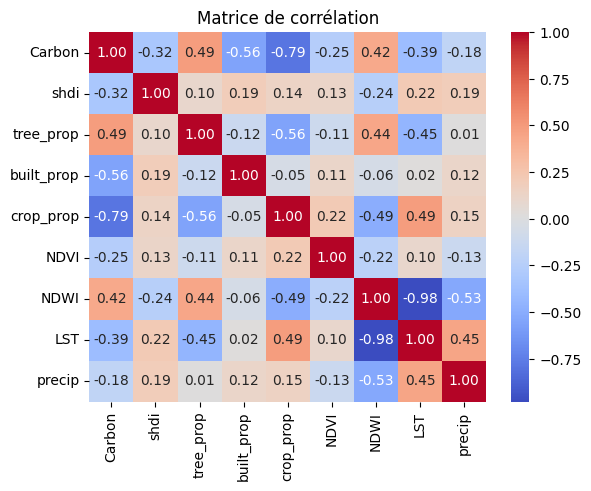

In [4]:
cor_matrix = data[cols[1:]].corr()
sns.heatmap(cor_matrix, annot = True, cmap = "coolwarm", fmt = '.2f')
plt.title("Matrice de corrélation")
plt.show()

## Scission de la base de données

In [5]:
x = data[["tree_prop", "built_prop", "crop_prop", "NDWI"]]
y = data['Carbon']

## Modèles linéaires

### Importation des packages

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

### Preprocessing 

In [7]:
## Scaler pour X et Y 
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

## Normalisation correcte des variables 
x_scale = scaler_x.fit_transform(x)
y_scale = scaler_y.fit_transform(y.values.reshape(-1,1))

## Split des données
train_x, test_x, train_y, test_y = train_test_split(x_scale, y_scale, test_size=0.3, random_state=42)

### Modèle avec variables sélectionnées 

In [8]:
lin_model = LinearRegression() ##Appel du modèle 

m1 = lin_model.fit(train_x, train_y)  ##Entraînement du modèle 
m1.score(test_x, test_y) ## Précision du modèle 

y_pred = m1.predict(test_x)  ##Estimation avec m
y_lm = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_test = scaler_y.inverse_transform(test_y.reshape(-1,1))

from sklearn.metrics import mean_squared_error

mse_lm = mean_squared_error(y_test, y_lm)
rmse_lm = np.sqrt(mse_lm)

print(f"MSE : {mse_lm:.2f}, RMSE : {rmse_lm:.2f}")

MSE : 488389189.05, RMSE : 22099.53


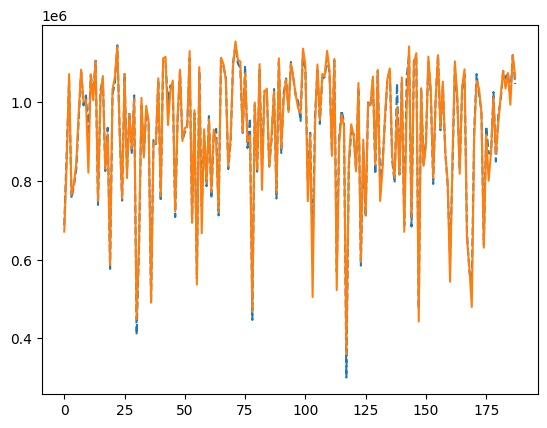

In [9]:
## Graphique 
plt.plot(y_lm, linestyle = '--')
plt.plot(y_test)
plt.show()

## Modèle Lasso

In [10]:
x_complet = data[cols[2:]]
##scaler 
scale_comp = MinMaxScaler(feature_range=(0,1))
x_complet = scale_comp.fit_transform(x_complet)

##SCISSION 

trf_x, tsf_x, trf_y, tsf_y = train_test_split(x_complet, y_scale, test_size = 0.3, random_state = 42)

## Définition du modèle Lasso 

lasso = Lasso(alpha = 0.1, max_iter = 10000)

## Entrainement

lasso.fit(trf_x, trf_y)

## Prédiction 

lass_pred = lasso.predict(tsf_x)
lass_pred = scaler_y.inverse_transform(lass_pred.reshape(-1,1))

mse_lass = mean_squared_error(y_test, lass_pred)
rmse_lass = np.sqrt(mse_lass)

print(f"MSE : {mse_lass:.2f} ; RMSE : {rmse_lass:.2F}")

MSE : 28431385278.49 ; RMSE : 168616.09


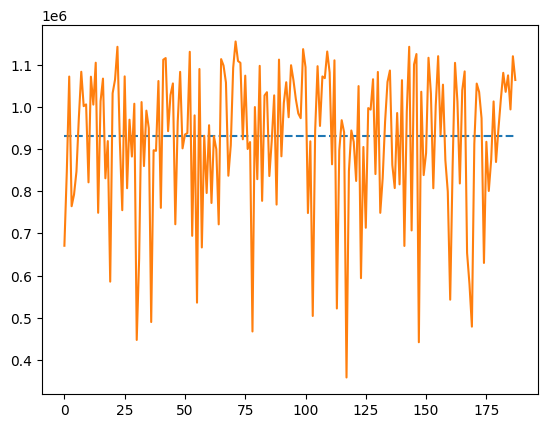

In [11]:
## Graphique 
plt.plot(lass_pred,linestyle = "--")
plt.plot(y_test)
plt.show()

## Modèle Ridge

In [12]:
ridge = Ridge(alpha =0.1, max_iter = 10000)

ridge.fit(trf_x, trf_y)

ridge_pred = ridge.predict(tsf_x)
ridge_pred = scaler_y.inverse_transform(ridge_pred.reshape(-1,1))

mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.2f}, RMSE : {rmse:.2f}")

MSE : 227626936.28, RMSE : 15087.31


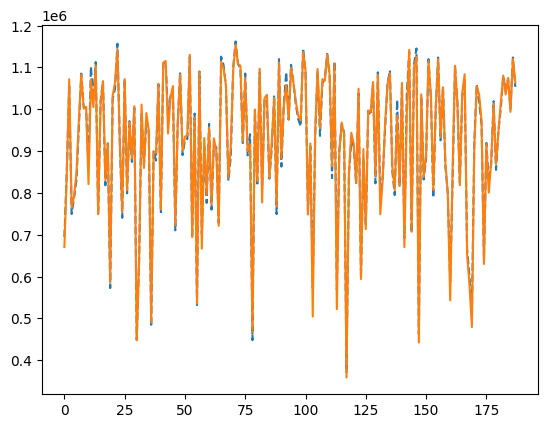

In [13]:
### Graphique 

plt.plot(ridge_pred, linestyle = '--')
plt.plot(y_test)
plt.show()

## Graphique comparative

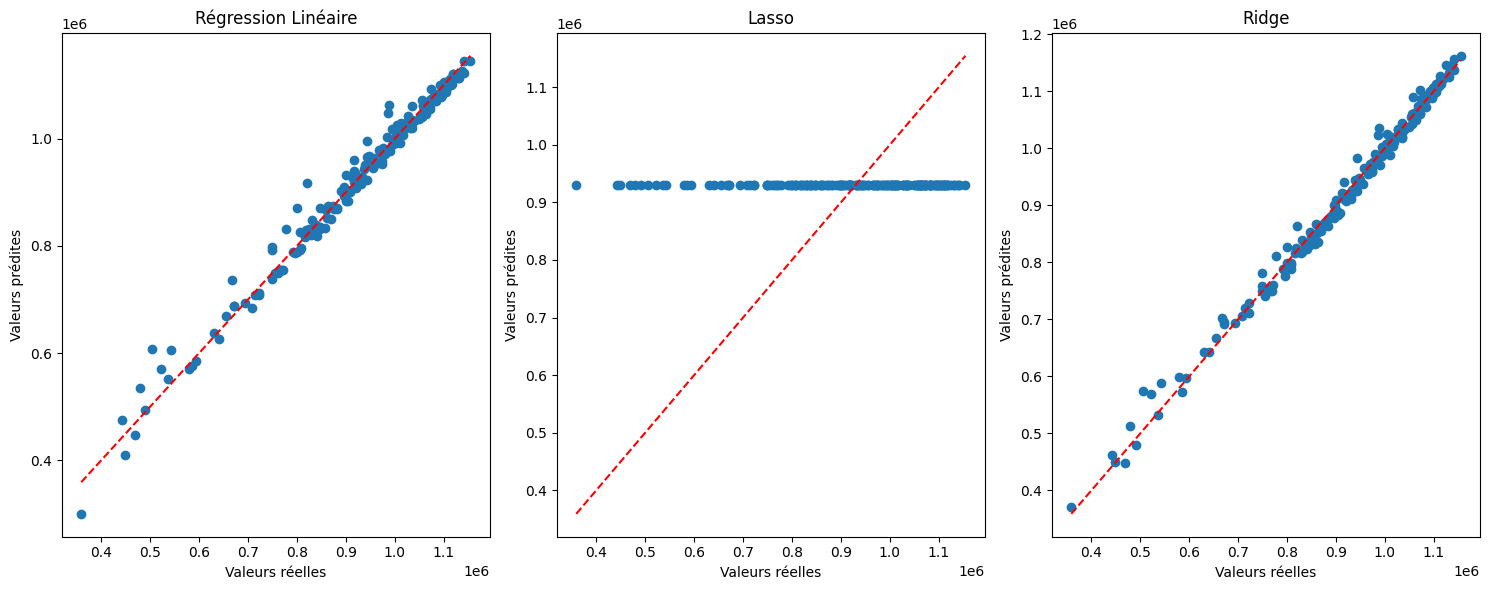

In [14]:
## Régression linéaire 
plt.figure(figsize = (15, 6))
plt.subplot(1, 3,1)
plt.scatter(x= y_test, y = y_lm)
lims = [y_test.min(), y_test.max()]
plt.plot(lims, lims, 'r--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression Linéaire')

## Lasso 
plt.subplot(1, 3,2)
plt.scatter(x= y_test, y = lass_pred)
plt.plot(lims, lims, 'r--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Lasso')

## Ridge 

plt.subplot(1,3,3)
plt.scatter(y_test, ridge_pred)
plt.plot(lims, lims, 'r--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Ridge')

plt.tight_layout()
plt.show()